# 6. Ensemble&지도시각화

## Ensemble

- 앞선 모델링의 결과를 비교하여 군집 별 최적의 모델 조합을 찾는다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import rc 
%matplotlib inline
rc('font', family='malgun gothic')
import seaborn as sns
from itertools import combinations
from tqdm import tqdm
import warnings
warnings.filterwarnings(action='ignore')

#앙상블에 활용할 수학함수
from scipy.stats.mstats import gmean, hmean
from itertools import combinations
from sklearn.metrics import mean_squared_error, mean_absolute_error
import geopandas as gpd

## Data For Ensemble

In [49]:
deep = pd.read_csv('predict/deep_06_predict.csv')
lr = pd.read_csv('predict/lr_06_predict.csv')
arima = pd.read_csv('predict/arima_06_predict.csv')

In [50]:
for i in range(7):
    globals()['ml_cl'+str(i)]=pd.read_csv('predict/ml_cl'+str(i)+'.csv')
    globals()['test_cl'+str(i)]=pd.read_csv('predict/cl'+str(i)+'_test.csv')

In [51]:
cluster0=['도두동','봉개동','삼도2동','송산동','안덕면','영천동','예래동','용담1동','이호동','일도1동','정방동','천지동','표선면','효돈동']
cluster1=['연동','일도2동']
cluster2=['동홍동','삼양동','아라동','외도동','화북동']
cluster3=['건입동','남원읍','대륜동','대정읍','대천동','삼도1동','서홍동','오라동','용담2동','이도1동','중문동','중앙동']
cluster4=['성산읍','애월읍']
cluster5=['노형동','이도2동']
cluster6=["구좌읍","조천읍","한경면","한림읍","알수없음"]

In [54]:
ml=pd.concat([ml_cl0,ml_cl1,ml_cl2,ml_cl3,ml_cl4,ml_cl5,ml_cl6],axis=1)

In [55]:
test=pd.concat([test_cl0,test_cl1,test_cl2,test_cl3,test_cl4,test_cl5,test_cl6],axis=1)

In [57]:
test.columns=['test'+str(i) for i in range(7)]
ml.columns=['ml'+str(i) for i in range(7)]

In [58]:
food_waste=pd.read_csv('01_제공데이터/01_음식물쓰레기_FOOD_WASTE.csv',encoding='cp949')

In [59]:
f=food_waste.groupby(['emd_nm','base_date'])['em_g'].sum().reset_index()

In [68]:
for i in range(7):
    c=globals()['cluster'+str(i)]
    globals()['cl'+str(i)]=f.query('emd_nm in @c & base_date>="2021-06-01"')[['emd_nm','base_date']].reset_index(drop=True)

In [70]:
for i in range(7):
    if i <6:
        globals()['cl'+str(i)]=pd.concat([globals()['cl'+str(i)],lr['lr'+str(i)],arima['arima'+str(i)],deep['d'+str(i)],ml['ml'+str(i)],test['test'+str(i)]],axis=1).dropna()
        globals()['cl'+str(i)].columns=['emd_nm_jh','base_date','lr','arima','deep','ml','test']
    else:
        globals()['cl'+str(i)]=pd.concat([globals()['cl'+str(i)],lr['lr'+str(i)],deep['d'+str(i)],ml['ml'+str(i)],test['test'+str(i)]],axis=1).dropna()
        globals()['cl'+str(i)].columns=['emd_nm_jh','base_date','lr','deep','ml','test']

## 앙상블 조합 찾기

- Testset인 6월 예측값을 통해 최적의 앙상블 조합을 찾는다
- 0~5번 군집은 유의미한 예측값을 갖는 Arima, Machine Learning, Linear Regressor, Deep Learning 모델들의 조합 중 최적의 예측 차이를 보여주는 조합을 선택한다.
- 6번 군집은 유의미한 예측값을 갖는 Machine Learning, Linear Regressor, Deep Learning의 모델들의 조합 중 최적의 예측 차이를 보여주는 조합을 선택한다.
- 최적의 결과는 앙상블된 모델들의 동별 예측값과 실제값의 차이의 합이다.
- 앙상블은 Gmean Ensenble(기하평균)을 활용한다

cl0
model: ['arima', 'ml']
MAE: 46571503.77862197
model: ['arima', 'lr']
MAE: 45631680.34616988
model: ['arima', 'deep']
MAE: 46425239.04809438
model: ['ml', 'lr']
MAE: 43058030.17769353
model: ['ml', 'deep']
MAE: 52900318.727655664
model: ['lr', 'deep']
MAE: 46817819.42580134
model: ['arima', 'ml', 'lr']
MAE: 45868001.646395415
model: ['arima', 'ml', 'deep']
MAE: 45433883.43481806
model: ['arima', 'lr', 'deep']
MAE: 45344236.27919109
model: ['ml', 'lr', 'deep']
MAE: 46132059.88156471
model: ['arima', 'ml', 'lr', 'deep']
MAE: 45096357.95260499
selected model= ['ml', 'lr']


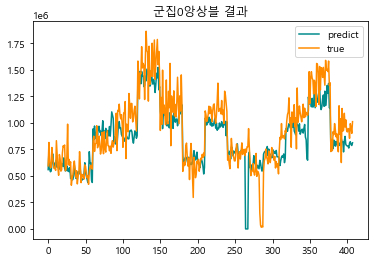

cl1
model: ['arima', 'ml']
MAE: 9167115.554201037
model: ['arima', 'lr']
MAE: 9316546.449015677
model: ['arima', 'deep']
MAE: 3500841.436269015
model: ['ml', 'lr']
MAE: 23742221.33712411
model: ['ml', 'deep']
MAE: 14653007.258336276
model: ['lr', 'deep']
MAE: 14868779.84021759
model: ['arima', 'ml', 'lr']
MAE: 14646058.113272399
model: ['arima', 'ml', 'deep']
MAE: 8436047.56039831
model: ['arima', 'lr', 'deep']
MAE: 8598032.52550298
model: ['ml', 'lr', 'deep']
MAE: 18287587.250005484
model: ['arima', 'ml', 'lr', 'deep']
MAE: 12709620.483326405
selected model= ['arima', 'deep']


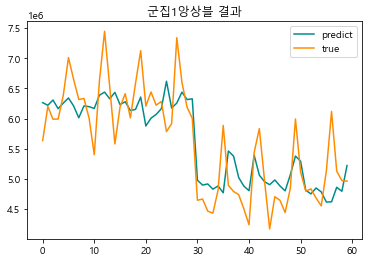

cl2
model: ['arima', 'ml']
MAE: 21254955.355436534
model: ['arima', 'lr']
MAE: 40834467.789067954
model: ['arima', 'deep']
MAE: 27949076.559329316
model: ['ml', 'lr']
MAE: 41825766.91420135
model: ['ml', 'deep']
MAE: 38969773.5942639
model: ['lr', 'deep']
MAE: 50175045.65978935
model: ['arima', 'ml', 'lr']
MAE: 33577490.24504122
model: ['arima', 'ml', 'deep']
MAE: 28948902.485028297
model: ['arima', 'lr', 'deep']
MAE: 36960546.30605607
model: ['ml', 'lr', 'deep']
MAE: 44330966.310371384
model: ['arima', 'ml', 'lr', 'deep']
MAE: 35671699.54798934
selected model= ['arima', 'ml']


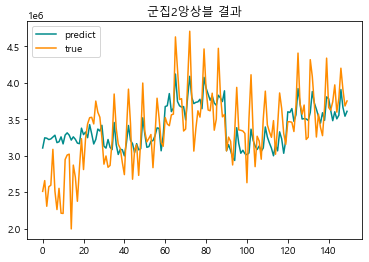

cl3
model: ['arima', 'ml']
MAE: 45476689.53844537
model: ['arima', 'lr']
MAE: 73550756.90489262
model: ['arima', 'deep']
MAE: 59976844.67920021
model: ['ml', 'lr']
MAE: 61226293.152208336
model: ['ml', 'deep']
MAE: 51336549.4887943
model: ['lr', 'deep']
MAE: 80233566.50385422
model: ['arima', 'ml', 'lr']
MAE: 57772014.87996375
model: ['arima', 'ml', 'deep']
MAE: 50719583.84447856
model: ['arima', 'lr', 'deep']
MAE: 71151786.48297215
model: ['ml', 'lr', 'deep']
MAE: 61356316.240590915
model: ['arima', 'ml', 'lr', 'deep']
MAE: 59401428.16038565
selected model= ['arima', 'ml']


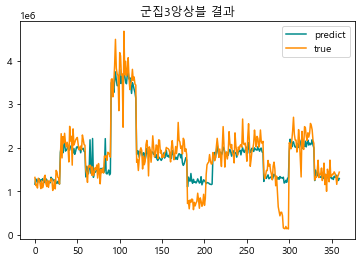

cl4
model: ['arima', 'ml']
MAE: 30340952.708356753
model: ['arima', 'lr']
MAE: 30554083.879589044
model: ['arima', 'deep']
MAE: 6622080.372106105
model: ['ml', 'lr']
MAE: 25705648.306135215
model: ['ml', 'deep']
MAE: 9976215.16047056
model: ['lr', 'deep']
MAE: 2076151.3937811404
model: ['arima', 'ml', 'lr']
MAE: 33635932.061053276
model: ['arima', 'ml', 'deep']
MAE: 13548006.45007144
model: ['arima', 'lr', 'deep']
MAE: 18117497.45858209
model: ['ml', 'lr', 'deep']
MAE: 14945606.3828931
model: ['arima', 'ml', 'lr', 'deep']
MAE: 23818990.43903154
selected model= ['lr', 'deep']


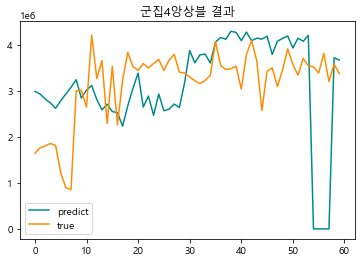

cl5
model: ['arima', 'ml']
MAE: 1491802.5207414925
model: ['arima', 'lr']
MAE: 11463046.770219862
model: ['arima', 'deep']
MAE: 13198907.110111147
model: ['ml', 'lr']
MAE: 35660873.62964612
model: ['ml', 'deep']
MAE: 18437441.39620775
model: ['lr', 'deep']
MAE: 24521845.569031864
model: ['arima', 'ml', 'lr']
MAE: 13996463.482672095
model: ['arima', 'ml', 'deep']
MAE: 1860237.4492266476
model: ['arima', 'lr', 'deep']
MAE: 8552136.493747473
model: ['ml', 'lr', 'deep']
MAE: 26615792.100255847
model: ['arima', 'ml', 'lr', 'deep']
MAE: 12379348.837116808
selected model= ['arima', 'ml']


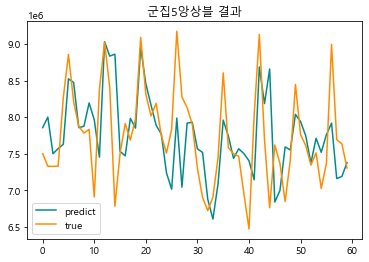

cl6
model: ['deep', 'ml']
MAE: 34.848049471644
model: ['deep', 'lr']
MAE: 458.4465058034265
model: ['ml', 'lr']
MAE: 471.8669549044226
model: ['deep', 'ml', 'lr']
MAE: 463.08637830928615
selected model= ['deep', 'ml']


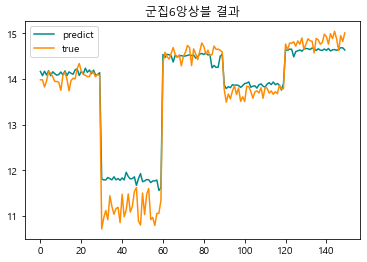

In [72]:
selected_model=[]
for j in range(7):
    x=globals()['cl'+str(j)]
    print('cl'+str(j))
    num=100000000
    clmin=[]
    if j<6:
        for i in range(2,5):
            models=list(combinations(['arima','ml','lr','deep'],i))
            for n in range(len(models)):
                m=list(models[n])
                x['gmean']=gmean(x[m],axis=1)
                te=x.groupby('emd_nm_jh')['test'].sum()
                gm=x.groupby('emd_nm_jh')['gmean'].sum()
                mae=sum(abs(te-gm))
                print('model:',m)
                print('MAE:',mae)
                if num>mae:
                    best_gm=np.array(x['gmean'])
                    clmin.append(m)
                    num=mae
        print('selected model=',clmin[-1])
        selected_model.append(clmin[-1])
        plt.plot(best_gm,label='predict',color='darkcyan')
        plt.plot(x['test'],label='true',color='darkorange')
        plt.title('군집'+str(j)+'앙상블 결과')
        plt.legend()
        plt.show()
        
    else:
        for i in range(2,4):
            models=list(combinations(['deep','ml','lr'],i))
            for n in range(len(models)):
                m=list(models[n])
                x['gmean']=gmean(x[m],axis=1)
                te=x.groupby('emd_nm_jh')['test'].sum()
                gm=x.groupby('emd_nm_jh')['gmean'].sum()
                mae=sum(abs(te-gm))
                print('model:',m)
                print('MAE:',mae)
                if num>mae:
                    best_gm=np.array(x['gmean'])
                    clmin.append(m)
                    num=mae
        print('selected model=',clmin[-1])
        selected_model.append(clmin[-1])
        plt.plot(best_gm,label='predict',color='darkcyan')
        plt.plot(x['test'],label='true',color='darkorange')
        plt.title('군집'+str(j)+'앙상블 결과')
        plt.legend()
        plt.show()

## 7월 앙상블

- 앞서 각 군집별로 선택된 모델들(selected_model)을 이용하여 7월 예측 결과값들을 앙상블한다.
- 앙상블은 Gmean알고리즘을 활용한다.

In [74]:
deep = pd.read_csv('predict/deep_07_predict.csv')
arima = pd.read_csv('predict/arima_07_predict.csv')
ml = pd.read_csv('predict/ml_07_predict.csv')
lr = pd.read_csv('predict/lr_07_predict.csv')

In [75]:
for j in range(7):
    d=[str(i).split(' ')[0] for i in pd.date_range('2021-07-01','2021-07-31',freq='D')]
    do=globals()['cluster'+str(j)]
    da=d*len(do)
    don=[]
    for i in do:
        don.extend(((i+',')*31).split(',')[:-1])
    globals()['base'+str(j)]=pd.DataFrame({'base_date_jh':da,'emd_nm_jh':don})

In [76]:
for i in range(7):
    if i <6:
        globals()['cl'+str(i)]=pd.concat([globals()['base'+str(i)],lr['lr'+str(i)],arima['arima'+str(i)],deep['d'+str(i)],ml['ml'+str(i)]],axis=1).dropna()
        globals()['cl'+str(i)].columns=['day','emd_nm','lr','arima','deep','ml']
    else:
        globals()['cl'+str(i)]=pd.concat([globals()['base'+str(i)],lr['lr'+str(i)],deep['d'+str(i)],ml['ml'+str(i)]],axis=1).dropna()
        globals()['cl'+str(i)].columns=['day','emd_nm','lr','deep','ml']

In [77]:
selected_model

[['ml', 'lr'],
 ['arima', 'deep'],
 ['arima', 'ml'],
 ['arima', 'ml'],
 ['lr', 'deep'],
 ['arima', 'ml'],
 ['deep', 'ml']]

In [417]:
for i in range(7):
        globals()['cl'+str(i)]['gmean']=gmean(globals()['cl'+str(i)][selected_model[i]],axis=1)

In [418]:
for i in range(len(cl0)):
    if cl0.loc[i,'gmean']==0:
        cl0.loc[i,'gmean']=cl0.loc[i,'ml']

for i in range(len(cl4)):
    if cl4.loc[i,'gmean']==0:
        cl4.loc[i,'gmean']=cl4.loc[i,'deep']

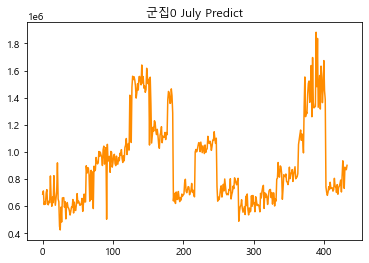

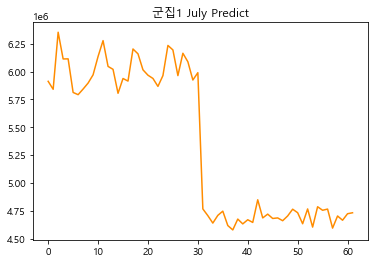

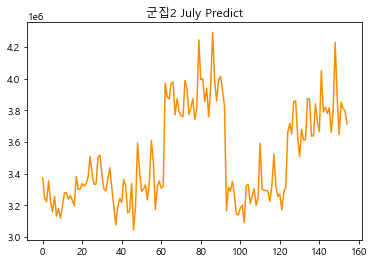

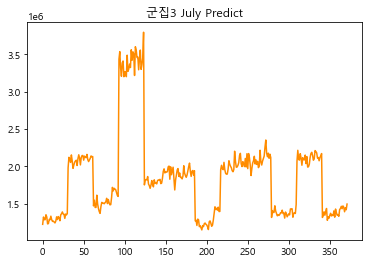

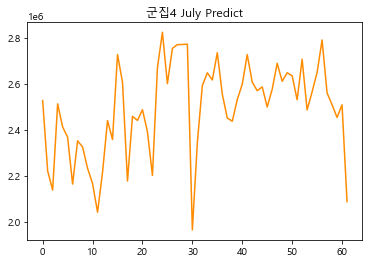

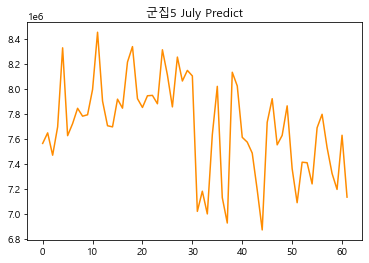

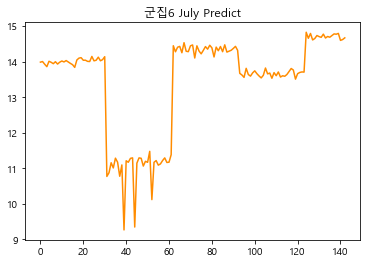

In [419]:
for i in range(7):
    globals()['cl'+str(i)]['gmean'].plot(color='darkorange')
    plt.title('군집'+str(i)+' July Predict')
    plt.show()

In [420]:
for i in range(7):
    if i == 0:
        july_sum = pd.DataFrame(globals()['cl'+str(i)].groupby('emd_nm')['gmean'].sum())
    else:
        july_sum = pd.concat([july_sum,pd.DataFrame(globals()['cl'+str(i)].groupby('emd_nm')['gmean'].sum())])
    

In [421]:
july_sum

,gmean
emd_nm,
도두동,2.015633e+07
봉개동,1.877409e+07
삼도2동,2.745396e+07
송산동,2.999711e+07
안덕면,4.566073e+07
영천동,3.712698e+07
예래동,2.147555e+07
용담1동,3.245871e+07
이호동,2.249135e+07


## 8월 앙상블

- 앞서 각 군집별로 선택된 모델들(selected_model)을 이용하여 8월 예측 결과값들을 앙상블한다.
- 앙상블은 Gmean알고리즘을 활용한다.

In [79]:
deep = pd.read_csv('predict/deep_08_predict.csv')
arima = pd.read_csv('predict/arima_08_predict.csv')
ml = pd.read_csv('predict/ml_08_predict.csv')
lr = pd.read_csv('predict/lr_08_predict.csv')

In [80]:
cluster0=['도두동','봉개동','삼도2동','송산동','안덕면','영천동','예래동','용담1동','이호동','일도1동','정방동','천지동','표선면','효돈동']
cluster1=['연동','일도2동']
cluster2=['동홍동','삼양동','아라동','외도동','화북동']
cluster3=['건입동','남원읍','대륜동','대정읍','대천동','삼도1동','서홍동','오라동','용담2동','이도1동','중문동','중앙동']
cluster4=['성산읍','애월읍']
cluster5=['노형동','이도2동']
cluster6=["구좌읍","조천읍","한경면","한림읍","알수없음"]

In [81]:
for j in range(7):
    d=[str(i).split(' ')[0] for i in pd.date_range('2021-08-01','2021-08-31',freq='D')]
    do=globals()['cluster'+str(j)]
    da=d*len(do)
    don=[]
    for i in do:
        don.extend(((i+',')*31).split(',')[:-1])
    globals()['base'+str(j)]=pd.DataFrame({'base_date_jh':da,'emd_nm_jh':don})

In [82]:
for i in range(7):
    if i <6:
        globals()['cl'+str(i)]=pd.concat([globals()['base'+str(i)],lr['lr'+str(i)],arima['arima'+str(i)],deep['d'+str(i)],ml['ml'+str(i)]],axis=1).dropna()
        globals()['cl'+str(i)].columns=['day','emd_nm','lr','arima','deep','ml']
    else:
        globals()['cl'+str(i)]=pd.concat([globals()['base'+str(i)],lr['lr'+str(i)],deep['d'+str(i)],ml['ml'+str(i)]],axis=1).dropna()
        globals()['cl'+str(i)].columns=['day','emd_nm','lr','deep','ml']

In [83]:
selected_model

[['ml', 'lr'],
 ['arima', 'deep'],
 ['arima', 'ml'],
 ['arima', 'ml'],
 ['lr', 'deep'],
 ['arima', 'ml'],
 ['deep', 'ml']]

In [84]:
for i in range(7):
        globals()['cl'+str(i)]['gmean']=gmean(globals()['cl'+str(i)][selected_model[i]],axis=1)

In [85]:
for i in range(len(cl0)):
    if cl0.loc[i,'gmean']==0:
        cl0.loc[i,'gmean']=cl0.loc[i,'ml']

for i in range(len(cl4)):
    if cl4.loc[i,'gmean']==0:
        cl4.loc[i,'gmean']=cl4.loc[i,'deep']

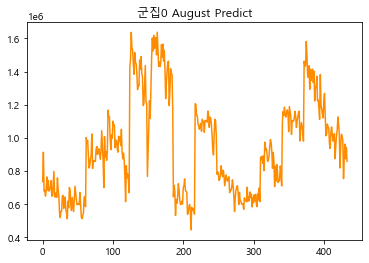

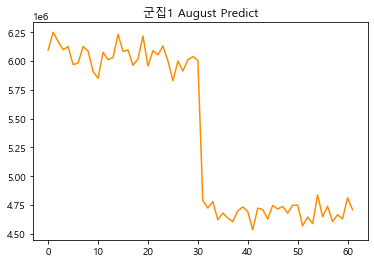

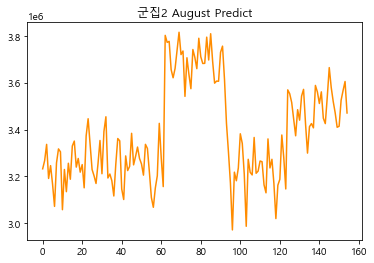

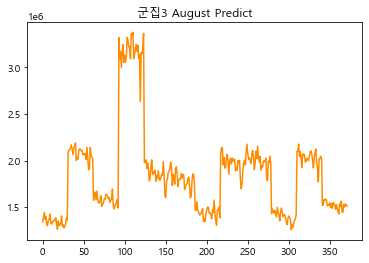

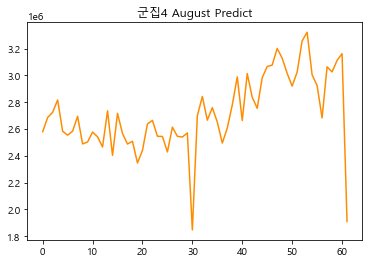

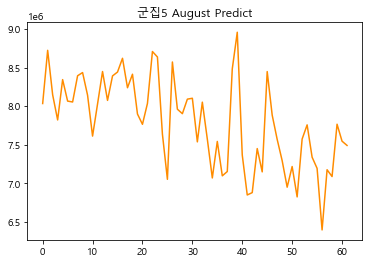

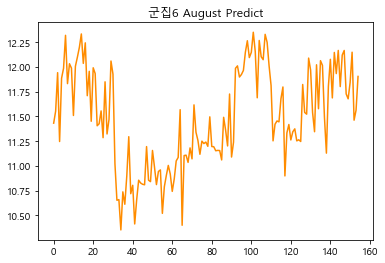

In [86]:
for i in range(7):
    globals()['cl'+str(i)]['gmean'].plot(color='darkorange')
    plt.title('군집'+str(i)+' August Predict')
    plt.show()

In [431]:
for i in range(7):
    if i == 0:
        august_sum = pd.DataFrame(globals()['cl'+str(i)].groupby('emd_nm')['gmean'].sum())
    else:
        august_sum = pd.concat([august_sum,pd.DataFrame(globals()['cl'+str(i)].groupby('emd_nm')['gmean'].sum())])
    

In [463]:
august_sum

,gmean
emd_nm,
도두동,2.094600e+07
봉개동,1.874434e+07
삼도2동,2.804284e+07
송산동,2.912128e+07
안덕면,4.127365e+07
영천동,4.512440e+07
예래동,1.922828e+07
용담1동,3.363775e+07
이호동,2.267097e+07


## 최종 평가 보고서

In [469]:
predict_sum=pd.concat([july_sum,august_sum],axis=1)

In [519]:
predict_sum.columns=['7월 배출량(g)','8월 배출량(g)']
predict_sum

,7월 배출량(g),8월 배출량(g)
emd_nm,,
도두동,2.015633e+07,2.094600e+07
봉개동,1.877409e+07,1.874434e+07
삼도2동,2.745396e+07,2.804284e+07
송산동,2.999711e+07,2.912128e+07
안덕면,4.566073e+07,4.127365e+07
영천동,3.712698e+07,4.512440e+07
예래동,2.147555e+07,1.922828e+07
용담1동,3.245871e+07,3.363775e+07
이호동,2.249135e+07,2.267097e+07


In [475]:
predict_sum.to_csv('result.csv',encoding='cp949')

## 최종결과 시각화

- 예측한 7,8월의 음식물 쓰레기 배출량을 제주도 지도에 매핑하여 동별로 비교해본다.

In [479]:
korea_file = 'Z_SOP_BND_ADM_DONG_PG/Z_SOP_BND_ADM_DONG_PG.shp'
korea = gpd.read_file(korea_file,encoding='cp949')
korea

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,OBJECTID,geometry
0,20200630,1101053,사직동,1,"POLYGON ((197702.069 453187.312, 197703.481 45..."
1,20200630,1101054,삼청동,2,"POLYGON ((197980.839 455346.068, 197995.471 45..."
2,20200630,1101055,부암동,3,"POLYGON ((196621.073 456395.880, 196628.373 45..."
3,20200630,1101056,평창동,4,"POLYGON ((197800.769 459064.245, 197782.531 45..."
4,20200630,1101057,무악동,5,"POLYGON ((196444.745 453384.564, 196471.668 45..."
...,...,...,...,...,...
3488,20200630,3902059,대륜동,3489,"MULTIPOLYGON (((154784.268 -30647.124, 154782...."
3489,20200630,3902060,대천동,3490,"MULTIPOLYGON (((153664.037 -29660.521, 153662...."
3490,20200630,3902061,중문동,3491,"POLYGON ((150267.980 -14695.696, 150377.051 -1..."
3491,20200630,3902062,예래동,3492,"MULTIPOLYGON (((141568.980 -29175.450, 141567...."


In [480]:
jeju=korea.loc[3492-43:3491,:]

In [481]:
jeju_here=jeju.query('ADM_DR_NM not in ["우도면","추자면"]')

In [500]:
jeju_here['emd_nm']=jeju_here['ADM_DR_NM']

In [501]:
jeju_here=pd.merge(jeju_here, july_sum.reset_index(),on='emd_nm')
jeju_here=pd.merge(jeju_here, august_sum.reset_index(),on='emd_nm')

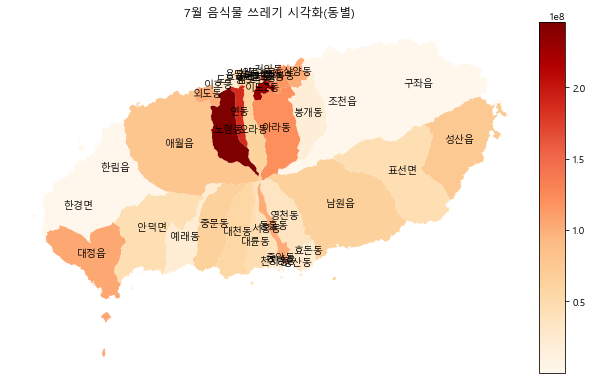

In [516]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# 동별 온도지도 그려보기
fig, ax = plt.subplots(1, 1,figsize=(10,10))
# 범례
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# 시각화
column = 'gmean_x'
jeju_here.plot(column, ax=ax, legend=True, cax=cax, cmap='OrRd')
ax.set_title("7월 음식물 쓰레기 시각화(동별)")
ax.set_axis_off()
jeju_here.apply(lambda x: ax.annotate(text=x.emd_nm, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.show()

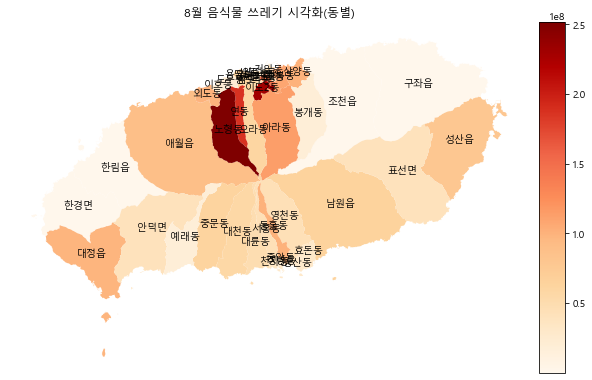

In [517]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# 동별 온도지도 그려보기
fig, ax = plt.subplots(1, 1,figsize=(10,10))
# 범례
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# 시각화
column = 'gmean_y'
jeju_here.plot(column, ax=ax, legend=True, cax=cax, cmap='OrRd')
ax.set_title("8월 음식물 쓰레기 시각화(동별)")
ax.set_axis_off()
jeju_here.apply(lambda x: ax.annotate(text=x.emd_nm, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.show()